In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Struje_munje_uz_50_posto_vjerojatnosti_v2.xlsx')

In [3]:
df.columns

Index(['x_axis', 'Lightning current waveform', 'values', 'Unnamed: 3',
       'Unnamed: 4', 'tf (us)', 'Ik (kA)', 'U_t_bez_odv (kV)',
       'U_t_odv_0 (kV)', 'U_t_odv_10 (kV)', 'U_t_odv_20 (kV)',
       'U_t_odv_40 (kV)', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

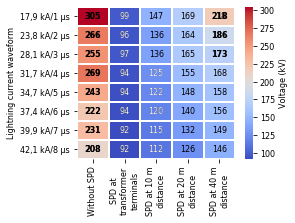

In [4]:
font_size = 8
# fig, ax = plt.subplots(figsize=(10,5))
fig, ax = plt.subplots(figsize=(3.5433,2.8))
transformer_voltage = df.pivot_table(index='Lightning current waveform', columns='x_axis', values='values')
# transformer_voltage = df.pivot_table(index='x_axis', columns='Lightning current waveform', values='values')
transformer_voltage_sorted = transformer_voltage[['Without SPD', 'SPD at transformer terminals', 'SPD at 10 m distance',
                                                  'SPD at 20 m distance', 'SPD at 40 m distance']]
ax = sns.heatmap(transformer_voltage_sorted, annot=True, annot_kws={"size":font_size, "color":'k'}, 
                 linecolor='white', linewidths=1, fmt=".0f", cmap='coolwarm')

# Highlight values > 170
sns.heatmap(transformer_voltage_sorted, mask=transformer_voltage_sorted < 170, 
            annot=True, linecolor='white', linewidths=1, annot_kws={"weight": "bold", "size":font_size, "color":'k'},
            cbar=False, fmt=".0f", cmap='coolwarm')

# Values <= 125 in white
sns.heatmap(transformer_voltage_sorted, mask=transformer_voltage_sorted > 125, 
            annot=True, linecolor='white', linewidths=1, annot_kws={"size":font_size, "color":'w'},
            cbar=False, fmt=".0f", cmap='coolwarm')

xticks = ['Without SPD', 'SPD at\ntransformer\nterminals', 'SPD at 10 m\ndistance',
          'SPD at 20 m\ndistance', 'SPD at 40 m\ndistance']
ax.set_xlabel('')
ax.set_xticklabels(xticks)
ax.set_ylabel('Lightning current waveform', fontsize=font_size)

# cbar fontsize
ax.figure.axes[-1].set_ylabel('Voltage (kV)', size=font_size)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=font_size)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
plt.savefig('heatmap.pdf', bbox_inches='tight', pad_inches=0.01)